<div class='alert alert-info'>
    <h1 align="center">Softmax Classifier</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Introduction
A softmax classifier is a type of classifier often used in multi-class classification tasks, where the goal is to assign an input to one of several classes. It uses the softmax function to compute the probability distribution over all possible output classes, allowing for a clear prediction by selecting the class with the highest probability. Since it provides probabilities for each class, it offers a level of confidence. Also, it's well-suited for tasks with more than two classes.

## How It Works
The softmax classifier typically includes the following steps:

1. **Linear Transformation**: For an input $X$, a set of weights $w$, and a bias $b$, the network computes a score $z$ for each class:
   $$ z = X w + b $$
   where $z$ is a vector containing scores for each class.

2. **Softmax Function**: The softmax function converts these scores into probabilities. For each class $i$, the softmax function is defined as:
   $$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{c} e^{z_j}} $$
   where $c$ is the number of classes. The softmax function ensures that each output is a positive number, and all outputs sum to 1, making them interpretable as probabilities.

3. **Prediction**: The predicted class is the one with the highest probability.

<center> <img src="Softmax.png" style="width:400px">  </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# numpy setup
np.random.seed(0)

In [3]:
# Import the dataset from keras
from tensorflow import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Scale the data
X_train = X_train/255
X_test = X_test/255

# Reshape the data to have all features in one column
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [5]:
# P rint the shapes of the vectors
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


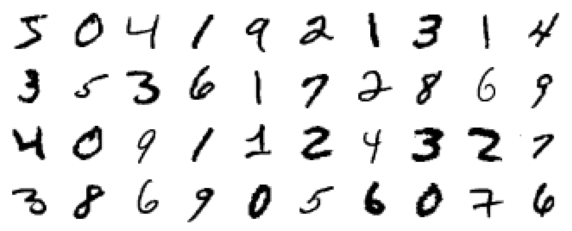

In [6]:
# Plot a grid of digit images from the provided dataset

# Set up the figure with a specific size
fig = plt.figure(figsize=(10, 4))

# Loop through the first 40 images in the dataset
for i in range(40):
    # Add a subplot at the i+1 position in a 4x10 grid
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    
    # Reshape each flattened 28*28 image to 2D and display it in grayscale
    ax.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)

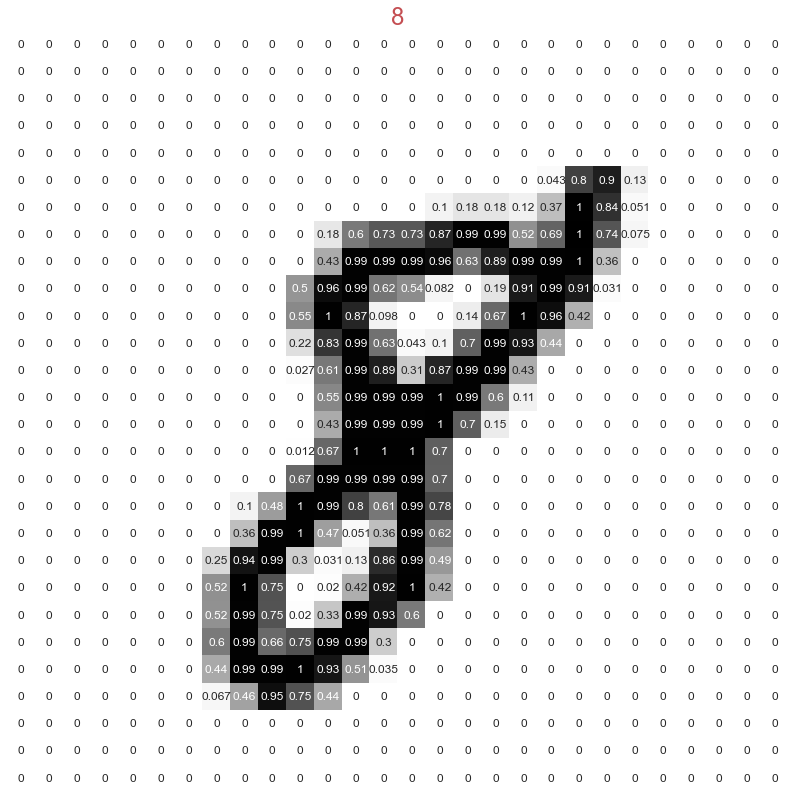

In [7]:
# Plot the heatmap of one digit as an example
# Select the 17th digit image from the training set and reshape it to 28x28
x = X_train[17].reshape(28,28)
y = y_train[17]

# Create a large figure for the heatmap
plt.figure(figsize=(14,14))

# Plot a heatmap of the digit, displaying pixel values in grayscale
sns.heatmap(x, annot=True, cmap=plt.cm.Greys, cbar=False)

# Set the title of the plot to the digit label (y) with styling
plt.title(y, size=24, color='r')

# Remove the x and y tick marks for a cleaner appearance
plt.xticks([])
plt.yticks([])

plt.show()

Since every pixel has a value in [0, 1], so there is no need for feature scaling.
But still we need to subtract the mean. Note that the mean vector is computed only from training data and subtracted from all data.

Subtracting the mean from the data is a common preprocessing step in machine learning and statistics known as **mean centering**. This process has several important benefits:

- **Zero Mean**: A dataset with a mean of zero can improve the performance and convergence of many machine learning algorithms, especially those that rely on gradient descent optimization, like neural networks.

- **Numerical Stability**: Mean centering can help reduce numerical instability.

- **Improved Training**: Many optimization algorithms (like those used in neural networks) perform better when the features are centered around zero. This can lead to faster convergence during training and may help to avoid issues like getting stuck in local minima.

- **Interpretability**: Centering the data can make it easier to interpret the results, particularly in regression contexts, where it can provide a more meaningful understanding of the coefficients and their relationship with the target variable.

In [8]:
# Compute mean vector from training data
mu = np.mean(X_train, axis=0)

# Remove mean vector from all data
X_train_norm = X_train - mu
X_test_norm  = X_test - mu

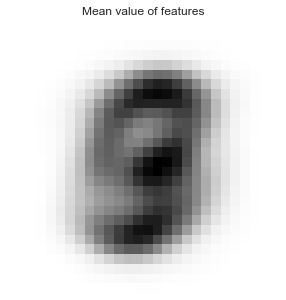

In [9]:
# Plot the mean vector as an image

# Set the size of the figure to 6x6 inches
plt.figure(figsize=(5, 5))

# Reshape the mean vector (flattened) back to a 28x28 image and display it in grayscale
plt.imshow(mu.reshape(28, 28), interpolation='nearest', cmap=plt.cm.Greys)

# Set the title of the plot to describe what is displayed
plt.title('Mean value of features')

# Remove x and y ticks for a cleaner visualization
plt.xticks([])
plt.yticks([])

plt.show()

The following code visualizes the effect of mean subtraction on a specific training image (the 17th example) to show how normalization changes the data. It plots the original image in the first subplot, and displays the normalized image (after mean subtraction) in the second subplot.

After subtracting the mean, which includes information in all samples, the image typically has more contrast and may appear more centered around neutral gray, as the average pixel intensity across the dataset is now centered at zero.

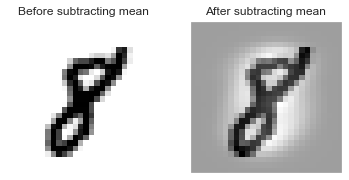

In [10]:
plt.subplot(1,2,1)
plt.imshow(X_train[17].reshape(28,28), cmap=plt.cm.binary)
plt.title('Before subtracting mean')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(X_train_norm[17].reshape(28,28), cmap=plt.cm.binary)
plt.title('After subtracting mean')
plt.xticks([])
plt.yticks([])

plt.show()

In [11]:
# A function to calculate the scores with given w and b
def predict(X, W, b):
    
    # Calculate the raw class scores for each example
    z = X @ W + b

    # Select the class with the highest score (index of maximum value) for each example
    return np.argmax(z, axis=1)

Since we have 10 different classes, if we predict labels using random initial weights and biases, we must get an accuracy about 10% becuase 1/10 of them will be classified correctly if the classifier is guessing the labels totally random.

In [12]:
# Number of classes (in this case, 10 classes, e.g., digits 0 to 9)
c = 10

# Number of features (each image is flattened to a 1D array of features)
n = X_train_norm.shape[1]

# Initialize parameters (weights and biases) for the model

# W is a (n, c) matrix of weights, initialized with small random values
W = 0.01 * np.random.randn(n, c)

# b is a (c,) vector of biases, initialized to zero
b = np.zeros(c)

# Compute the class scores for each example by taking the dot product
# of input data and weights, then adding bias
# The resulting shape is (number of examples, c)
y_pred = np.argmax(X_train_norm @ W + b, axis=1)

# Compute accuracy by comparing predicted labels with true labels
# np.mean(y_pred == y_train) gives the proportion of correct predictions
acc = 100. * np.mean(y_pred == y_train)

# Print accuracy with two decimal places
print('Accuracy = {:.2f}%'.format(acc))

Accuracy = 7.18%


# Loss Function of the Softmax Classifier

The loss function commonly used for a softmax classifier is the **cross-entropy loss**. This loss function measures the dissimilarity between the predicted probability distribution (from the softmax function) and the true distribution (usually represented as a one-hot encoded vector for classification tasks).

## Softmax Function

Before understanding the loss, let’s recall the softmax function. For a vector of scores (logits) $z$ for $c$ classes, the softmax function converts these scores into probabilities $p$:

$$ p_i = \frac{e^{z_i}}{\sum_{j=1}^{c} e^{z_j}} $$

where:
- $p_i$ is the probability of class $i$,
- $z_i$ is the score for class $i$,
- $c$ is the total number of classes.

The output $p$ is a probability distribution over the classes, meaning all $p_i$ sum to 1.

## Cross-Entropy Loss

The cross-entropy loss quantifies the difference between two probability distributions: the predicted distribution $p$ from the softmax function and the true distribution $y$. For a single example, where $y$ is a one-hot encoded vector, the cross-entropy loss $L$ is defined as:

$$ L(y, p) = -\sum_{i=1}^{c} y_i \log(p_i) $$

For multiple examples, the average loss over all examples is often used:

$$ L(y, p) = -\frac{1}{m} \sum_{k=1}^{m} \sum_{i=1}^{c} y_{k,i} \log(p_{k,i}) $$
where:
- $m$ is the number of examples,
- $y_{k,i}$ is the true label for example $k$ (1 if example $k$ belongs to class $i$, otherwise 0),
- $p_{k,i}$ is the predicted probability of example $k$ being of class $i$.

## Derivation of the Cross-Entropy Loss

1. **Likelihood of the Correct Class**: For a single training example, if the true class is $j$, the probability assigned to this class by the model is $p_j$. The likelihood of observing the true label under the model is $p_j$.

2. **Log-Likelihood**: We take the logarithm of the likelihood, which transforms multiplication into addition, making optimization easier. The log-likelihood for the correct class is $\log(p_j)$.

3. **Negative Log-Likelihood**: To turn the maximization of the log-likelihood into a minimization problem, we use the negative log-likelihood, resulting in the expression $-\log(p_j)$.

4. **Generalizing to Multiple Classes**: Since we deal with multiple classes and often represent the true class in a one-hot encoded format, the loss can be expressed as the sum over all classes multiplied by the true label: $-\sum_{i=1}^{c} y_i \log(p_i)$.

## Interpretation of Cross-Entropy

- **Penalty for Incorrect Predictions**: The loss is higher when the predicted probability $p_j$ for the true class $j$ is low, which means that the model is penalized more for being confident about an incorrect class.
- **Sensitivity to Probabilities**: Cross-entropy loss is particularly sensitive to the predicted probabilities assigned to the true classes. If the model is very confident (i.e., close to 1) but wrong, the loss will be very high due to the logarithmic function, leading to significant penalties for poor predictions.

## Gradients
$$ \frac{\partial L}{\partial w} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial w} = \frac{1}{m} X^T (P-Y) $$

$$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (P_i-Y_i) $$

These gradients can be used in the gradient descent update rules:
$$ w = w - \alpha \frac{\partial L}{\partial w}$$

$$ b = b - \alpha \frac{\partial L}{\partial b} $$
where $\alpha$ is the learning rate.

In [13]:
# Function to compute softmax loss and gradient

def softmax_loss(W, b, X, y, mode='train'):
    
    bs = X.shape[0]  # bache size
    
    # Compute class scores
    z = X @ W + b
    
    # Apply softmax to compute probabilities
    probs = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    # Compute cross-entropy loss
    loss = -np.sum(np.log(probs[range(bs), y])) / bs
    
    if mode == 'test':
        return loss # Return loss for test mode
    
    # Compute gradient of loss with respect to scores
    dz = np.copy(probs)
    dz[range(bs), y] -= 1.0  # Adjust for correct class
    
    # Compute gradient with respect to W and b
    dW = X.T @ dz       # Gradient with respect to W
    db = dz.sum(axis=0) # Gradient with respect to b
    
    return loss, dW, db

In [14]:
# a function to apply gradient descent algorithm

def mini_bach_GD(X, y, batch_size=32, alpha=0.01, num_classes=10,
                 lmbda=1e-4, num_epochs=100):
    
    m, n = X.shape  # m: number of samples, n: number of features
    num_batches = m // batch_size  # Total number of batches per epoch
    
    report = 'Epoch {:3d}: loss = {:.2f}'
    
    # # Initialize parameters W and b
    W = np.random.randn(n, num_classes) * 0.001   # Small random weights
    b = np.zeros((num_classes,))                  # Initialize biases to zero
    
    for epoch in range(num_epochs):
        train_loss = 0   # Track total loss for each epoch
        
        for batch in range(num_batches):
            
            # Randomly select a mini-batch
            idx = np.random.choice(m, batch_size, replace=False)
            X_batch, y_batch = X[idx], y[idx]
            
            # Compute data loss and gradients
            loss, dW, db = softmax_loss(W, b, X_batch, y_batch) # data loss
            loss += 0.5 * lmbda * np.sum(W**2)                  # L2 regularization
            
            # Add gradient of regularization term to dW
            dW += lmbda * W
            
            train_loss += loss  # Accumulate loss
            
            # Update parameters
            b -= alpha * db
            W -= alpha * dW
            
        # Average the loss over all batches for the epoch
        train_loss /= num_batches
        
        # Display loss per epoch
        print(report.format(epoch+1, train_loss))
    
    return W, b

In [15]:
# Run the mini-batch algorithm
W, b = mini_bach_GD(X_train_norm, y_train, batch_size=64, alpha=1e-2,
                    lmbda=1e-4, num_epochs=30)

Epoch   1: loss = 0.35
Epoch   2: loss = 0.29
Epoch   3: loss = 0.28
Epoch   4: loss = 0.28
Epoch   5: loss = 0.28
Epoch   6: loss = 0.28
Epoch   7: loss = 0.28
Epoch   8: loss = 0.28
Epoch   9: loss = 0.28
Epoch  10: loss = 0.28
Epoch  11: loss = 0.28
Epoch  12: loss = 0.29
Epoch  13: loss = 0.28
Epoch  14: loss = 0.28
Epoch  15: loss = 0.28
Epoch  16: loss = 0.28
Epoch  17: loss = 0.28
Epoch  18: loss = 0.28
Epoch  19: loss = 0.29
Epoch  20: loss = 0.28
Epoch  21: loss = 0.27
Epoch  22: loss = 0.28
Epoch  23: loss = 0.28
Epoch  24: loss = 0.29
Epoch  25: loss = 0.28
Epoch  26: loss = 0.28
Epoch  27: loss = 0.28
Epoch  28: loss = 0.28
Epoch  29: loss = 0.29
Epoch  30: loss = 0.28


In [16]:
# Calculate the training accuracy
acc = 100 * np.mean(predict(X_train_norm, W, b) == y_train)

print('Train accuracy = {:.2f}%'.format(acc))

Train accuracy = 93.19%


In [17]:
# Calculate the test accuracy
acc = 100 * np.mean(predict(X_test_norm, W, b) == y_test)

print('Test accuracy = {:.2f}%'.format(acc))

Test accuracy = 92.23%


Using the trained weights and biases, the algorithm could read the handwritten digits with high accuracy.

Now, let's plot some of the digits with the top 5 predicted probabilities.

In [18]:
# A function to plot predictions

def predict_plots(probs, x, y, mu, classes, shape=(28,28)):
    
    plt.figure(figsize=(5,2))
    
    # Plot the original digit
    plt.subplot(121)
    
    # Add mean back to normalize the digit image
    x = x + mu
    
    plt.imshow(x.reshape(shape), interpolation='nearest', cmap=plt.cm.Greys)
    
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Actual: {y}')
    
    # Plot top 5 predicted probabilities
    idx = np.argsort(probs)[-5:]      # Get indices of top 5 predictions
    ticks = [classes[i] for i in idx] # Map indices to class names/labels
    colors = ['g' if i==y else 'r' for i in idx] # Color green if correct, red if incorrect
    
    plt.subplot(122)
    # Horizontal bar plot
    plt.barh(range(5), width=probs[idx], tick_label=ticks, color=colors)
    plt.xlim(0,1)
    plt.title('Top five preictions')
    plt.show()    

In [19]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

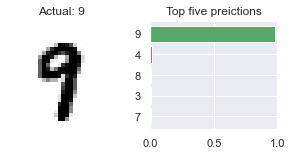

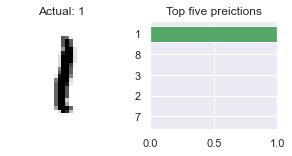

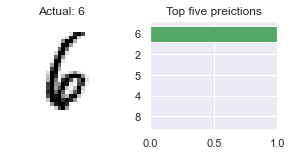

In [20]:
# Plot 3 randomly selected data points from the test set
for i in range(3):
    
    # Select a random index from the test set
    idx = np.random.choice(X_test_norm.shape[0])
    
    # Compute the scores for each class by multiplying input with weights and adding bias
    z = X_test_norm[idx].reshape((1,-1)) @ W + b
    
    # Convert scores to probabilities using softmax
    probs = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    # Extract the probabilities array from the 2D result
    probs = probs[0]

    # Plot the predictions and the original image using the 'predict_plots' function
    predict_plots(probs, X_test_norm[idx], y_test[idx], mu, classes)

# Softmax classifier using Sklearn

In scikit-learn, the `LogisticRegression` class can be used to implement a softmax classifier by setting the `multi_class` parameter to `"multinomial"` and `solver` to a method that supports multinomial loss (e.g., `"lbfgs"` or `"saga"`). The softmax classifier is essentially a generalized logistic regression for multi-class classification.

- **`multi_class="multinomial"`**: Specifies that we are using the softmax function for multi-class classification.
- **`solver="lbfgs"`**: A gradient-based optimization algorithm that works well with the multinomial option. You can also use `"saga"` if you’re working with a large dataset or sparse data.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
# Initialize the Softmax classifier
softmax_classifier = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Fit the model to the training data
softmax_classifier.fit(X_train_norm, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [23]:
# Make predictions on the training set
y_train_pred = softmax_classifier.predict(X_train_norm)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train accuracy = {train_accuracy * 100:.2f}%')

# Make predictions on the test set
y_test_pred = softmax_classifier.predict(X_test_norm)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy = {test_accuracy * 100:.2f}%')

Train accuracy = 93.93%
Test accuracy = 92.56%


You can also use `score` method to estimate the accuracy as follows:

In [24]:
# Evaluate the model on train dataset
train_accuracy = softmax_classifier.score(X_train_norm, y_train)
print(f'Train accuracy = {train_accuracy * 100:.2f}%')

# Evaluate the model on test dataset
test_accuracy = softmax_classifier.score(X_test_norm, y_test)
print(f'Test accuracy = {test_accuracy * 100:.2f}%')

Train accuracy = 93.93%
Test accuracy = 92.56%


Or estimate the accuracy as follows:

In [25]:
# Evaluate the model on train dataset
train_accuracy = np.mean(y_train_pred == y_train)
print(f'Train accuracy = {train_accuracy * 100:.2f}%')

# Evaluate the model on test dataset
test_accuracy = np.mean(y_test_pred == y_test)
print(f'Test accuracy = {test_accuracy * 100:.2f}%')

Train accuracy = 93.93%
Test accuracy = 92.56%


In [26]:
# Obtain the probability estimates for each class in the test set
probs = softmax_classifier.predict_proba(X_test_norm)

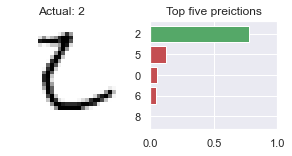

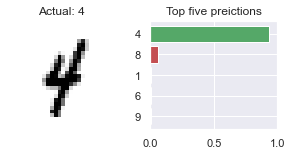

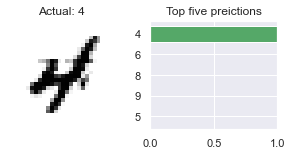

In [27]:
# Plot 3 randomly selected data points from the test set
for i in range(3):
    
    # Select a random index from the test set
    idx = np.random.choice(X_test_norm.shape[0])
    
    # Compute the scores for each class by multiplying input with weights and adding bias
    z = X_test_norm[idx].reshape((1,-1)) @ W + b
    
    # Convert scores to probabilities using softmax
    probs = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    # Extract the probabilities array from the 2D result
    probs = probs[0]

    # Plot the predictions and the original image using the 'predict_plots' function
    predict_plots(probs, X_test_norm[idx], y_test[idx], mu, classes)

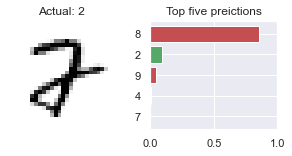

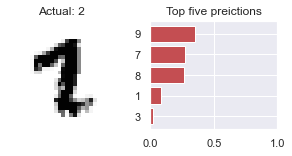

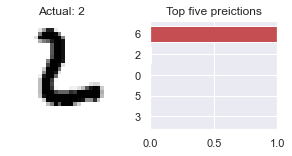

In [28]:
# Get indices of misclassified examples
# Indices where predictions do not match true labels
misclassified_idx = np.flatnonzero(y_test_pred != y_test)

# Randomly select 3 indices from the misclassified samples
sample_idx = np.random.choice(misclassified_idx, 3, replace=False)

# Plot the 3 misclassified samples
for i in sample_idx:
    
    # Get the probability estimates for the selected misclassified sample
    prob = softmax_classifier.predict_proba(X_test_norm[i].reshape((1,-1)))[0]
    
    # Plot the misclassified sample along with its probability distribution
    predict_plots(prob, X_test_norm[i], y_test[i], mu, classes)

In [29]:
# Compute confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred, labels=range(10))
print(cm)

[[ 955    0    2    4    1   10    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  930   14   10    3   12   10   34    4]
 [   4    1   16  925    1   23    2   10   19    9]
 [   1    3    7    3  921    0    6    5    6   30]
 [   9    2    3   35   10  777   15    6   31    4]
 [   8    3    8    2    6   16  912    2    1    0]
 [   1    7   23    7    6    1    0  947    4   32]
 [   9   11    6   22    7   29   13   10  855   12]
 [   9    8    1    9   21    7    0   21    9  924]]


Now, let's plot a heatmap with normalized confusion matrix.

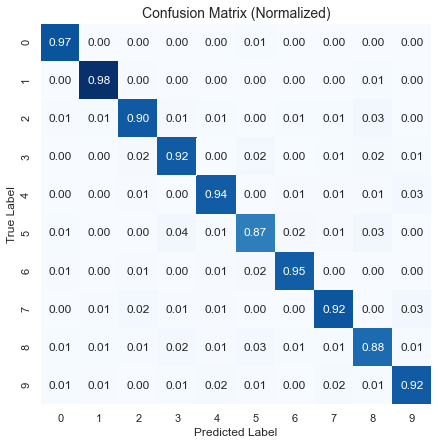

In [30]:
# Set up the figure
plt.figure(figsize=(7,7))

# Normalize the confusion matrix rows by dividing each entry by the sum of the corresponding row
annot = cm/cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap with normalized values displayed as annotations
sns.heatmap(cm, annot=annot, fmt='.2f', cmap=plt.cm.Blues, cbar=False)

# Add title and axis labels for clarity
plt.title('Confusion Matrix (Normalized)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()